# Question 3

Objectives:

1. Report mean and median trip distance group by hour of day

2. We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transcations fit this criteria, the average fair and any other interesting characterisitcs of these trips.



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('/Users/EshaSomavarapu/Downloads/green_tripdata_2015-09.csv')

In [3]:
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [4]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

### Objective 1 

In [5]:
# Mean and Median trip distance grouped by hour of the day
def pickup_dropTime(pdt):
    pdt.loc[:,'lpep_pickup_datetime'] = pd.to_datetime(pdt['lpep_pickup_datetime'])
    pdt.loc[:,'Lpep_dropoff_datetime'] = pd.to_datetime(pdt['Lpep_dropoff_datetime'])
    pdt.loc[:,'trav_mins'] = (pdt.Lpep_dropoff_datetime-pdt.lpep_pickup_datetime).astype('timedelta64[m]')
    pdt.loc[:,'hour'] = pdt.lpep_pickup_datetime.map(lambda x: x.hour)
    pdt.loc[:,'weekday'] = pdt.lpep_pickup_datetime.map(lambda x: x.weekday())
    pdt.loc[:,'weekday'] = pdt.weekday.map({0:0,1:0,2:0,3:0,4:0,5:1,6:1})
    return pdt

In [6]:
df = pickup_dropTime(df)
#Group Trip Distance on a hourly basis
tripDistance_hourly = df.groupby('hour')['Trip_distance']

Text(0,0.5,'Average Trip Distance')

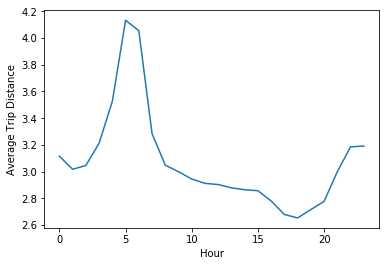

In [7]:
#Plot Mean of Hourly Trip Distance
tripDistance_hourly.mean().plot()
plt.xlabel('Hour')
plt.ylabel('Average Trip Distance')

Text(0,0.5,'Median Trip Distance')

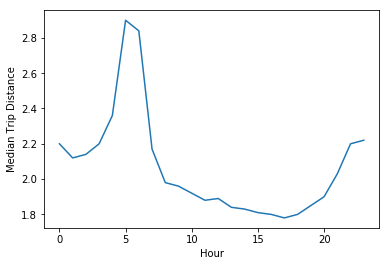

In [8]:
# Plot Median Hourly Trip Distance
tripDistance_hourly.median().plot()
plt.xlabel('Hour')
plt.ylabel('Median Trip Distance')

### Objective 2

Rough Estimate of trip that originate or terminate at one of NYC area aiports...

While reading through the data dictionary, I noticed that RateCodeID variable contains values for the final rate at the end of trip. Since, JFK and Newark happen to be most popular aiports in New York, We can use RateCodeID JFK - 2 and Newark - 3 to recognize average fair of trips at one of airports. Also, futhur explore if one airport is more popular than the other by number of trips taken.

RateCodeID:
* 1 = Standard rate
* 2 = JFK
* 3 = Newark
* 4 = Nassau or Westchester
* 5 = Negotiated fare
* 6 = Group ride 

In [9]:
# Choose JFK and Newark airports trips

jfk_airports_trips = df[(df.RateCodeID==2)]
nwk_airports_trips = df[(df.RateCodeID==3)]
both_aiports_trips = df[(df.RateCodeID==2)| (df.RateCodeID==3)]

#Count number of trips from NYC airports
print('Number of trips to/from NYC airports (JFK and Newark) = ', both_aiports_trips.shape[0])
print('Number of trips to/from Newark airport = ', nwk_airports_trips.shape[0])
print('Number of trips to/from JFK airport = ', jfk_airports_trips.shape[0])
print()

#Calculate Average fair for NYC aiports
#Using variable Fare_amount which contains time-and-distance fare calculated by the meter.

print('Average fair of trips to/from NYC airports = ', both_aiports_trips.Fare_amount.mean())
#print('Average fair of trips to/from Newark airport = ', nwk_airports_trips.Fare_amount.mean())
#print('Average fair of trips to/from JFK airport = ', jfk_airports_trips.Fare_amount.mean())

print()
#Calculate Average fair before tip
#Using Total Amount that contains amount charged to passengers before cash tips
print('Average fair of trips to/from NYC airports before tip = ', both_aiports_trips.Total_amount.mean())

Number of trips to/from NYC airports (JFK and Newark) =  5552
Number of trips to/from Newark airport =  1117
Number of trips to/from JFK airport =  4435

Average fair of trips to/from NYC airports =  48.976945245

Average fair of trips to/from NYC airports before tip =  57.208420389


Summary:

We notice that there is high spikes in the morning in our plot of average trip distance by hour, since most of the passengers are travelling to a certain place(ex: work) via taxi. Also, there fewer trips taken by green taxis during nightime which indicates most passengers might be in a rush to reach their destination in the morning than while making it home.

Using RateCodeID, we can conclude that Average Number of Trips to/from NYC airports is 5552. JFK and Newark are both international airports and both of the airports are located within 20 miles of Manhattan,NY. But JFK seems to have about three times as many people coming and leaving the airport. Our observation as well as quick google search indicate that JFK(4435) is more popular airport than Newark(1117) due to high connectivity and wide range of flights to fly across the world.

In [16]:
#df.to_csv('out.csv')